rectangle no.119 relatively changed by  0.1573 
rectangle no. 87 relatively changed by  0.1065 
rectangle no.  7 relatively changed by  0.0799 


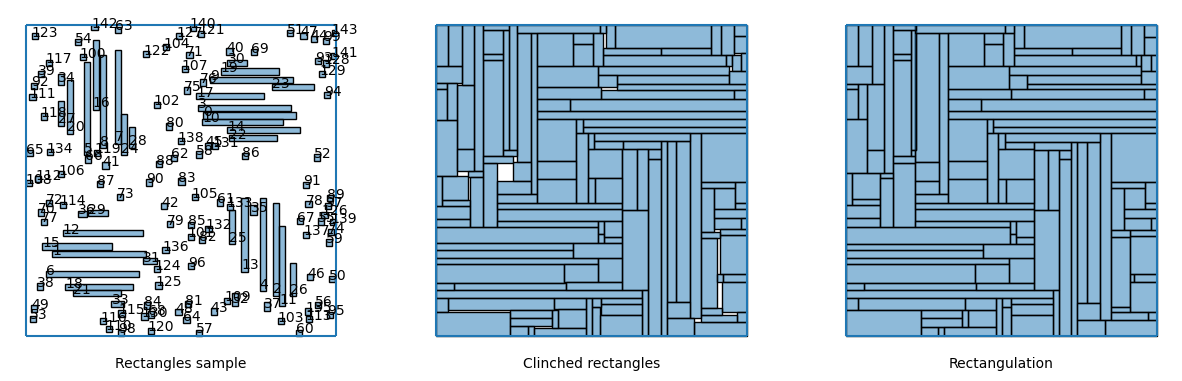

In [8]:
import numpy as np
from SquareDivision.src.rectangle_class import Rectangulation
from SquareDivision.src.distributions import FromFunction, BetweenFunctions, tepui, surface_perp_to

rects = Rectangulation(config={"seed": 12345378})

tepui_kwargs_width = {
    'top' : 0.3, 
    'bottom' : 0.02, 
    'slope' : 3, 
    'vertex' : 0.5, 
    'pts' : np.array([[0.25, 0.25],[0.75, 0.75]])
    }
tepui_kwargs_height = {
    'top' : 0.3, 
    'bottom' : 0.02, 
    'slope' : 3, 
    'vertex' : 0.5, 
    'pts' : np.array([[0.75, 0.25],[0.25, 0.75]])
    }

width_0 = lambda mid_pt: tepui(mid_pt, **tepui_kwargs_width)
width_1 = width_0
height_0 = lambda mid_pt: tepui(mid_pt, **tepui_kwargs_height)
height_1 = height_0


rects.sample_rectangles(
    num=200, 
    widths_strategy = BetweenFunctions(func_0=width_0, func_1=width_1, rng=rects.rng), 
    heights_strategy= BetweenFunctions(func_0=height_0, func_1=height_1, rng=rects.rng), 
)
rects.perform()
rects.report(tol=0.01, digits=4, limit_list=3)
rects.draw(disjoint=True, disjoint_nums=True, inflated=True, inflated_nums=False, closed=True, closed_nums=False)

In [9]:
areas = rects.closed[:,2] * rects.closed[:,3]
print(np.argmin(areas))
np.isclose((rects.closed[:,2] * rects.closed[:,3]).sum(), 1)

8


True

In [6]:
def disjoint_family(rect_family: np.ndarray):
    """ 
    check if rectangles in rect_family (N, 4) is 
    family of disjoint rectangles or not
    """
    def rectangles_disjoint_in_axis_Q(r0: np.ndarray, r1: np.ndarray, axis: int):
        """
        ri is [x,y,width,height] for i \in 0,1
        checking if
            r0 is below r1 OR r1 is below r0
        """
        r0_r1 = r0[axis] + r0[axis + 2] - r1[axis]
        r1_r0 = r1[axis] + r1[axis + 2] - r0[axis]
        r0_r1_Q = r0_r1 <= 0 or np.isclose(r0_r1, 0)
        r1_r0_Q = r1_r0 <= 0 or np.isclose(r1_r0, 0)
        return r0_r1_Q or r1_r0_Q
    def rectangles_disjoint_Q(r0: np.ndarray, r1: np.ndarray):
        """ 
        if rectangles are disjoint in one of the axies they are disjoint"""
        disjoint_on_axis_0 = rectangles_disjoint_in_axis_Q(r0, r1, 0)
        disjoint_on_axis_1 = rectangles_disjoint_in_axis_Q(r0, r1, 1)
        return disjoint_on_axis_0 or disjoint_on_axis_1
    shape = (len(rect_family), len(rect_family))
    disjoint_Q = np.zeros(shape=shape)
    for i, r0 in enumerate(rect_family):
        for j, r1 in enumerate(rect_family):
            if i != j:
                disjoint_Q[i,j] = rectangles_disjoint_Q(r0, r1)
            else:
                continue
    all_disjoint_Q = np.all(disjoint_Q == 1 - np.eye(shape[0],shape[1]))
    return all_disjoint_Q
disjoint_family(rects.closed)
# np.eye(shape[0],shape[1])
# (1-disjoint_Q).sum()

True

In [23]:
rng = np.random.default_rng(seed=0)
rng.integers

{'bit_generator': 'PCG64',
 'state': {'state': 35399562948360463058890781895381311971,
  'inc': 87136372517582989555478159403783844777},
 'has_uint32': 0,
 'uinteger': 0}

### graph f : (0, 1)^2 -> R

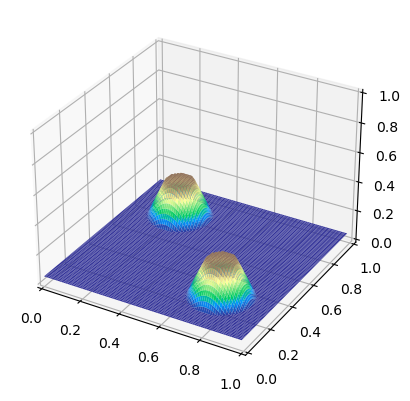

In [34]:
import numpy as np
from SquareDivision.src.distributions import surface_perp_to, tepui
from SquareDivision.draw.draw import draw_func
surface_perp_to_kwargs = {'vect' : np.array([0, -1, 5]), 'val_at_0' : 0.005}
tepui_kwargs = {
    'top' : 0.3, 
    'bottom' : 0.05, 
    'slope' : 3, 
    'vertex' : 0.5, 
    'pts' : np.array([[0.75, 0.25],[0.25, 0.75]]) #[0.75, 0.25],[0.25, 0.75]
    }
# draw_func(surface_perp_to, func_kwargs = surface_perp_to_kwargs )
draw_func(tepui, func_kwargs = tepui_kwargs )

In [14]:
from SquareDivision.morph.inflate_strategy import MaxHomThenMaxPushFromOrder
strategy = MaxHomThenMaxPushFromOrder()
# rects.disjoint = strategy.inflate(rects.disjoint)
rects.draw(disjoint=True, inflated=True, inflated_nums=True, closed=True, closed_nums=False)

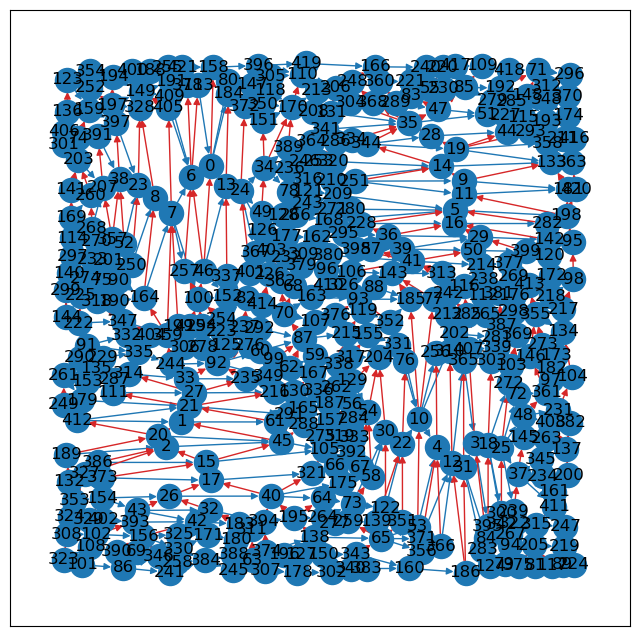

In [12]:
rects.draw_contact_graph(1)

In [12]:
from SquareDivision.contact_graph.incidence_matrix import idxs_of_touching_rectangles_in_dir
idxs_of_touching_rectangles_in_dir(6, rects.clinched_rectangles, 'd')

array([ 4,  8, 14], dtype=int64)

In [44]:
# nums =np.array([1,1,1])
# np.all(nums == 1)
np.asarray([np.array([1,1,1])]).flatten()

array([1, 1, 1])

In [385]:
import re

# s = "      -0002147483647Ghsjdhs"
# s= "    words and -987"
s = "0000-a45dsd"
def myAtoi(s: str) -> int:
    # remove whitespaces
    s = s[re.match(pattern='^(\s*)', string=s).end():]
    if len(s) == 0:
        #idiot check
        return 0
    elif len(s) == 1:
        return int(s) if s in '0123456789' else 0
    sign = 1
    if (s[0] == '-') or (s[0] == '+'):
        sign = -1 if s[0] == '-' else 1
        s = s[1:]
    if (s[0] not in '0123456789') == True:
        return 0
    s = re.match(pattern='^[0-9]*',string=s).group(0)
    if s == '0':
        # one zero
        return sign * 0
    s = s[re.match(pattern='^0*',string=s).end():]
    if s == '':
        # manmy zeros
        return 0
    if len(s) > 10 and sign == 1:
        return 2147483647
    elif len(s) > 10 and sign == -1:
        return -2147483648
    elif len(s) < 10:
        return sign * int(s)

    # # now length of s is 10
    for i, (num, bound) in enumerate(zip(s, '2147483647')):

        if num < bound:
            # when <= last place as well
            return sign * int(s)
        elif num == bound and i != 9:
            continue
        elif num > bound and i != 9:
            cap = 2147483647 if sign == 1 else -2147483648
            return cap
    # we are here only if last digit num is 7, 8 or 9

    if sign == 1:
        return 2147483647
    elif num >= '8':
        return -2147483648
    return -2147483647

myAtoi(s) 

2147483647

In [596]:
pw = 'rdd$sss2sdRDsd'
# pw ='a'
import re
class Solution:
    def strongPasswordChecker(self, password: str) -> int:
        r"""        
        rule 1 It has at least 6 20 characters.
        rule 2 one lowercase letter, at least one uppercase letter, and at least one digit.
        rule 3 no 3  repeating characters
        /questions/5142103/regex-to-validate-password-strength
        ^                         Start anchor
        (?=.*[A-Z])               Ensure string has at least one uppercase letter.
        # (?=.*[!@#$&*])            Ensure string has at least one special case letter.
        (?=.*[0-9])               Ensure string has at least one digit.
        (?=.*[a-z])               Ensure string has at least one lowercase letter.
        .{6,20}                   Ensure string is of length 6 to 20.
        (?!.*(.)\1{2,})           Ensure string do not contain 3 repoeted characters
        $                         End anchor.
        """ 
        if re.match(
            pattern="^(?=.*[A-Z])(?=.*[0-9])(?=.*[a-z])(?!.*(.)\\1{2,}).{6,20}$",
            string=password) != None:
            # strong passes
            return 0

        return 4


In [599]:
pw = 'rdd$sss2sdRDsd'
# pw ='a'
sol = Solution()
sol.strongPasswordChecker(pw)

4

In [25]:
import re
pw = 'aaa111bbb'
# (.)\1{2}
matches = re.findall( 
    pattern=r'(.)\1{2}',
    string=pw)
# re.match(
#     pattern='.{3}',#"^(.)\\1{2,2}((.)\\1{2,2})",
#     string=pw)
for match in matches:
    print(match)

a
1
b


In [ ]:
pw = 'aaaaaa111bbb'
re.sub(
    pattern=r'((.)\1{2})', 
    repl=r'\1', 
    string=pw,
    count=1)

In [55]:
import re

def replace_char(match):
   return '#' + match.group(0)

pw = 'aaaaaa111bbb'
new_string = re.sub(r'(.)\1{3}', replace_char, pw, 3)
new_string

'#aaaaaa111bbb'

In [565]:
dividend = 2147483647
divisor = 1
bin_res = ''
shifts = []
shift =0
cum_sum = 0
while dividend - cum_sum - (divisor << shift) >= 0:
    if dividend - cum_sum - (divisor << shift + 1) < 0:
        shifts.append(shift)
        cum_sum += (divisor << shift)
        shift = 0
    else:
        shift += 1
if max(shifts) + 1 <= 31:
    bin_len = max(shifts) + 1
    overflow_flag = False
else:
    overflow_flag = True
print(overflow_flag)
bin_res = '0'*bin_len
for num in shifts:
    place = bin_len - num - 1
    bin_res = bin_res[:place] + '1' + bin_res[place+1:]

int('0b'+bin_res,2)

False


2147483647

'-0b10000000000000000000000000000000'

In [570]:
''.zfill(6+1) == '0'*(6+1)

# place = 6 - 4
# test = test[:place] + '1' + test[place+1:] 
# test

True